<a href="https://colab.research.google.com/github/lsantiago/PythonIntermedio/blob/master/Clases/Semana7_SYMPY/Clase7_SymPy_vacia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASE 7: SymPy

![](http://sympy.org/static/images/logo.png)

_ __SymPy es una biblioteca de Python para matemática simbólica__. Apunta a convertirse en un sistema de algebra computacional (__CAS__) con todas sus prestaciones manteniendo el código tan simple como sea posible para manterlo comprensible y fácilmente extensible. SymPy está __escrito totalmente en Python y no requiere bibliotecas adicionales__. _Este proyecto comenzó en 2005, fue lanzado al público en 2007 y a él han contribuido durante estos años cientos de personas._

_ Otros CAS conocidos son Mathematica y Maple, sin embargo ambos son software privativo y de pago. [Aquí](https://github.com/sympy/sympy/wiki/SymPy-vs.-Maple) puedes encontrar una comparativa de SymPy con Maple. _

Hoy veremos cómo:

* Crear símbolos y expresiones.
* Manipular expresiones (simplificación, expansión...)
* Calcular derivadas e integrales.
* Límites y desarrollos en serie.
* Resolución de ecuaciones.
* Resolción de EDOs.
* Matrices

Sin embargo, SymPy no acaba aquí ni mucho menos...

## Documentación & SymPy Live Shell

[Documentacion](http://docs.sympy.org/latest/index.html)


[SympyGamma](http://www.sympygamma.com/input/?i=integrate%281+%2F+%281+%2B+x^2%29%29)

## Creación de símbolos

Lo primero, como siempre, es importar aquello que vayamos a necesitar:

In [ ]:
!pip install sympy

In [1]:
#import sympy as sp
from sympy import *

In [2]:
init_printing(use_latex=True)



* Gracias a `use_latex=True` obtenemos la salida en $\LaTeX$.
* __Ha creado una serie de variables__ para que podamos ponernos a trabajar en el momento.

<div class="alert warning-info"><strong>Nota:</strong> 
En Python, no se declaran las variables, sin embargo, no puedes usar una hasta que no le hayas asignado un valor. Si ahora intentamos crear una variable `a` que sea `a = 2 * b`, veamos qué ocurre:
</div>

In [3]:
# Intentamos usar un símbolo que no hemos creado
a = 2 * b

NameError: name 'b' is not defined

Como en `b` no había sido creada, Python no sabe qué es `b`.

Esto mismo nos ocurre con los símbolos de SymPy. __Antes de usar una variable, debo decir que es un símbolo y asignárselo:__

In [5]:
# Creamos el símbolo a
a = symbols("a")
a

In [6]:
# Número pi
(a + pi)**2

In [8]:
# Unidad imaginaria
1 + 2*I

In [9]:
# Número e
E ** 2

In [10]:
# Vemos qué tipo de variable es a
type(a)

sympy.core.symbol.Symbol

Ahora ya podría crear `b = 2 * a`:

In [11]:
b = 2 * a
b

¿Qué está ocurriendo? Python detecta que a es una variable de tipo `Symbol` y al multiplicarla por `2` devuelve una variable de Sympy.

Como Python permite que el tipo de una variable cambie, __si ahora le asigno a `a` un valor float deja de ser un símbolo.__

In [12]:
b = 2.0

In [13]:
type(b)

float

---
__Las conclusiones son:__

* __Si quiero usar una variable como símbolo debo crearla previamente.__
* Las operaciones con símbolos devuelven símbolos.
* Si una varibale que almacenaba un símbolo recibe otra asignación, cambia de tipo.

---

__Las variables de tipo `Symbol` actúan como contenedores en los que no sabemos qué hay (un real, un complejo, una lista...)__. Hay que tener en cuenta que: __una cosa es el nombre de la variable y otra el símbolo con el que se representa__.

In [15]:
#creación de símbolos
alpha, beta = symbols("alpha beta")
alpha, beta

In [18]:
c_T = symbols("c_T")
c_T

Incluso puedo hacer cosas raras como:

In [16]:
# Diferencia entre variable y símbolo
b = symbols("d")
b

Además, se pueden crear varos símbolos a la vez:

In [20]:
x, y, z, t = symbols("x, y, z, t")
x, y, z, t

y símbolos griegos:

__Por defecto, SymPy entiende que los símbolos son números complejos__. Esto puede producir resultados inesperados ante determinadas operaciones como, por ejemplo, lo logaritmos. __Podemos indicar que la variable es real, entera... en el momento de la creación__:

In [21]:
# Creamos símbolos reales
x, y, z, t = symbols("x, y, z, t")

In [22]:
# restricciones sobre el simbolo
x.assumptions0

{'commutative': True}

In [23]:
# Podemos ver las asunciones de un símbolo
x = symbols("x", real=True, positive=True)

In [24]:
x.assumptions0


{'real': True,
 'commutative': True,
 'imaginary': False,
 'finite': True,
 'hermitian': True,
 'complex': True,
 'extended_real': True,
 'infinite': False,
 'positive': True,
 'nonpositive': False,
 'negative': False,
 'extended_positive': True,
 'extended_nonnegative': True,
 'nonnegative': True,
 'extended_negative': False,
 'extended_nonpositive': False,
 'extended_nonzero': True,
 'nonzero': True,
 'zero': False}

## Expresiones

Comencemos por crear una expresión como: $\cos(x)^2+\sin(x)^2$

In [25]:
cos(z) ** 2 + sin(z) ** 2

### `simplify()`

Podemos pedirle que simplifique la expresión anterior:

In [26]:
simplify(_25)

In [27]:
sqrt(z**2)

In [29]:
simplify(_27)

In [30]:
y = symbols("y", real=True)

In [31]:
simplify(sqrt(y**2))

In [32]:
simplify(sqrt(x**2))

En este caso parece estar claro lo que quiere decir más simple, pero como en cualquier _CAS_ el comando `simplify` puede no devolvernos la expresión que nosotros queremos. Cuando esto ocurra necesitaremos usar otras instrucciones.

### `.subs()`

En algunas ocasiones necesitaremos sustituir una variable por otra, por otra expresión o por un valor.

In [33]:
_25.subs(z, 1+x**2)

In [34]:
(sin(x)**2 + cos(y)**2).subs({x: 1+ z, y: 1-z})

Cambia el `sin(x)` por `exp(x)`

In [35]:
sin(x).replace(sin, exp)

Particulariza la expresión $sin(x) + 3 x $ en $x = \pi$

In [36]:
(sin(x)+3*x).subs(x, pi)

__Aunque si lo que queremos es obtener el valor numérico lo mejor es `.evalf()`__

In [37]:
_36.evalf()

In [40]:
_36.evalf(n=27)

In [ ]:
#ver pi con 25 decimales


In [41]:
#el mismo resultado se obtiene ocn la función N()
N(_36)

# Simplificación

SymPy ofrece numerosas funciones para __simplificar y manipular expresiones__. Entre otras, destacan:

* `expand()`
* `factor()`
* `collect()`
* `apart()`
* `cancel()`

Puedes consultar en la documentación de SymPy lo que hace cada una y algunos ejemplos. __Existen también funciones específicas de simplificación para funciones trigonométricas, potencias y logaritmos.__ Abre [esta documentación](http://docs.sympy.org/latest/tutorial/simplification.html) si lo necesitas.

##### ¡Te toca!

Pasaremos rápidamente por esta parte, para hacer cosas "más interesantes". Te proponemos algunos ejemplos para que te familiarices con el manejor de expresiones:

__Crea las expresiones de la izquierda y averigua qué función te hace obtener la de la derecha:__

expresión 1| expresión 2
:------:|:------:
$\left(x^{3} + 3 y + 2\right)^{2}$    |    $x^{6} + 6 x^{3} y + 4 x^{3} + 9 y^{2} + 12 y + 4$
$\frac{\left(3 x^{2} - 2 x + 1\right)}{\left(x - 1\right)^{2}} $ | $3 + \frac{4}{x - 1} + \frac{2}{\left(x - 1\right)^{2}}$
$x^{3} + 9 x^{2} + 27 x + 27$         |    $\left(x + 3\right)^{3}$
$\sin(x+2y)$                          |    $\left(2 \cos^{2}{\left (y \right )} - 1\right) \sin{\left (x \right )} + 2 \sin{\left (y \right )} \cos{\left (x \right )} \cos{\left (y \right )}$


In [42]:
x, y = symbols("x y")

In [43]:
#1
(x**3 + 3*y+2)**2

In [44]:
expand(_43)

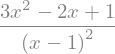

In [46]:
#2
(3*x**2-2*x+1)/(x-1)**2

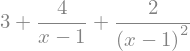

In [47]:
apart(_46)

In [ ]:
#3


In [48]:
(x**3 + 9*x**2 + 27*x + 27).factor()

In [50]:
#4
sin(x+2*y)

In [51]:
expand(_, trig=True)

In [52]:
expand_trig(_50)

# Derivadas e integrales

Puedes derivar una expresion usando el método `.diff()` y la función `diff()`

In [53]:
#creamos una expresión
expresion = cos(x)

#obtenemos la derivada primera con funcion
expresion.diff(x)

In [54]:
#utilizando método
diff(expresion)

__¿derivada tercera?__

In [55]:
expresion.diff(x, x, x)

In [56]:
expresion.diff(x, 3)

__¿varias variables?__

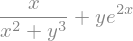

In [58]:
expr = y * exp(2*x) + x / (x**2 + y**3)
expr

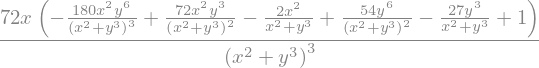

In [59]:
expr.diff(x, 2, y, 3)

__Queremos que la deje indicada__, usamos `Derivative()`

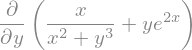

In [60]:
Derivative(expr, y)

__¿Será capaz SymPy de aplicar la regla de la cadena?__

In [61]:
# Creamos una función F
F = Function("F")
F(x)

In [62]:
# Creamos una función G
G = Function("G")
G(x)

$$\frac{d}{d x} F{\left (G(x) \right )} $$

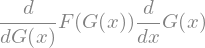

In [63]:
# Derivamos la función compuesta F(G(x))
F(G(x)).diff(x)

En un caso en el que conocemos las funciones:

In [64]:
# definimos una f
f = 3 * x + cos(y)

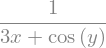

In [65]:
# definimos una g(f)
g = 1 / f
g

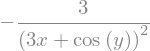

In [66]:
#la derivamos
g.diff(x)

##### Te toca integrar

__Si te digo que se integra usando el método `.integrate()` o la función `integrate()`__. ¿Te atreves a integrar estas casi inmediatas...?:

$$\int{\cos(x)^2}dx$$
$$\int{\frac{dx}{\sin(x)}}$$
$$\int{\frac{dx}{(x^2+a^2)^2}}$$



In [68]:
#integrate?

In [69]:
cos(x)**2

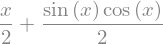

In [70]:
integrate(cos(x)**2)

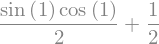

In [73]:
integrate(cos(x)**2, (x, 0, 1))

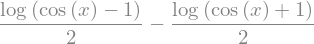

In [71]:
(1/sin(x)).integrate()

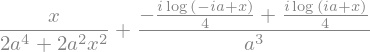

In [72]:
integrate(1/(x**2+a**2)**2, x)

# Límites

Calculemos este límite sacado del libro _Cálculo: definiciones, teoremas y resultados_, de Juan de Burgos:

$$\lim_{x \to 0} \left(\frac{x}{\tan{\left (x \right )}}\right)^{\frac{1}{x^{2}}}$$

Primero creamos la expresión:

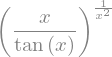

In [75]:
expr = (x/tan(x))**(1/x**2)
expr

Obtenemos el límite con la función `limit()` y si queremos dejarlo indicado, podemos usar `Limit()`:

In [76]:
limit(expr, x, 0)

In [77]:
oo

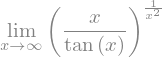

In [78]:
limit(expr, x, oo)

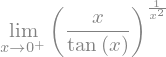

In [79]:
# para dejar indicado
Limit(expr, x, 0)

# Series

Los desarrollos en serie se pueden llevar a cabo con el método `.series()` o la función `series()`

In [80]:
#creamos la expresión
expr = cos(x)

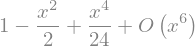

In [81]:
#la desarrollamos en serie
expr.series(x)

Se puede especificar el número de términos pasándole un argumento `n=...`. El número que le pasemos será el primer término que desprecie.

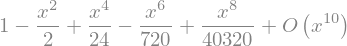

In [82]:
# Indicando el número de términos
expr.series(x, n=10)

Si nos molesta el $\mathcal{O}(x^{10})$ lo podemos quitar con `removeO()`:

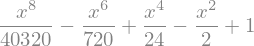

In [84]:
_.removeO()

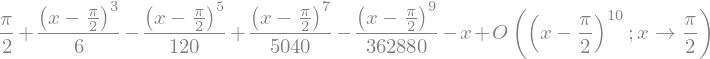

In [86]:
expr.series(x, n=10, x0=pi/2)

---

## Resolución de ecuaciones

Como se ha mencionado anteriormente las ecuaciones no se pueden crear con el `=`

In [87]:
#creamos la ecuación
a + x = cos(x)

SyntaxError: can't assign to operator (<ipython-input-87-0342a43a7f55>, line 2)

In [89]:
Eq(1+x, x**2)


In [91]:
Eq(1+x - x**2, 0)

In [92]:
# También la podemos crear como
ecuacion = Eq(1+x-sin(x), 0)
ecuacion

In [94]:
ecuacion2 = Eq(x**2+1, 0)

In [96]:
#la resolvemos
sol = solve(ecuacion2, x)
sol

Pero la gracia es resolver con símbolos, ¿no?
$$a e^{\frac{x}{t}} = C$$

In [98]:
# Creamos los símbolos y la ecuación
C = symbols("C")
C

In [99]:
# La resolvemos
ecuacion = Eq(a*exp(x/t), C)
ecuacion

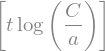

In [100]:
solve(ecuacion, x)

Si consultamos la ayuda, vemos que las posibilidades y el número de parámetros son muchos, no vamos a entrar ahora en ellos, pero ¿se ve la potencia?

## Ecuaciones diferenciales

Tratemos de resolver, por ejemplo:

$$y{\left (x \right )} + \frac{d}{d x} y{\left (x \right )} + \frac{d^{2}}{d x^{2}}  y{\left (x \right )} = \cos{\left (x \right )}$$

In [102]:
# solo sirve para ejemplos acádemicos sencillos 

y = Function('y')
y

y

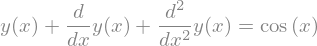

In [103]:
edo = Eq(y(x) + y(x).diff(x) + y(x).diff(x, 2), cos(x))
edo

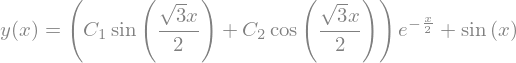

In [104]:
#resolvemos
dsolve(edo,y(x))

# Matrices

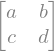

In [105]:
#creamos una matriz llena de símbolos
a, b, c, d = symbols('a, b, c, d')
a, b, c, d

A = Matrix([
            [a, b],
            [c, d]
])
A

In [ ]:
#sacamos autovalores
A.eigenvals()


In [ ]:
A.eigenvects()

In [ ]:
#inversa
A.inv()

In [ ]:
#elevamos al cuadrado la matriz
A ** 2